# **Implementación de un modelo de deep learning**
*Author: Myroslava Sánchez Andrade*
<br>*Creation date: 05/10/2022*
<br>*Last updated:*

---
## **Extract**

The dataset used for this project is **[Kuzushiji-49](https://github.com/rois-codh/kmnist)**, downloaded from a GitHub repository. It contains 270,912 images (28x28 grayscale) that contains a total of 49 classes, 48 Hiragana characters and one Hiragana iteration mark (imbalanced dataset).

In [ ]:
# REQUIRED LIBRARIES
# !pip install numpy keras

In [1]:
# RUN ONLY FOR GOOGLE COLAB

from google.colab import drive

drive.mount("/content/gdrive")  

%cd "/content/gdrive/MyDrive/TC3007C_Module2"

Mounted at /content/gdrive
/content/gdrive/MyDrive/TC3007C_Module2


In [59]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
# Importing the necessary libraries
import numpy as np
import tensorflow as tf
import os, time

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Loading the datasets
def load(f):
    return np.load(f)['arr_0']

# Directory to be scanned
x_train = load('./data/original/k49-train-imgs.npz')
x_test = load('./data/original/k49-test-imgs.npz')
y_train = load('./data/original/k49-train-labels.npz')
y_test = load('./data/original/k49-test-labels.npz')

In [ ]:
x_train.shape

(232365, 28, 28)

---
## **Transform**

In [ ]:
x_train.shape

(232365, 784)

---
## **Load**

In [5]:
np.save('./data/flattened/k49-train-imgs.npy', x_train)
np.save('./data/flattened/k49-test-imgs.npy', x_test)
np.save('./data/flattened/k49-train-labels.npy', y_train)
np.save('./data/flattened/k49-test-labels.npy', y_test)

---
## **Model (deep neural network)**

In [6]:
# Loading the datasets
def load(f):
    return np.load(f)['arr_0']

# Directory to be scanned
x_train = load('./data/original/k49-train-imgs.npz')
x_test = load('./data/original/k49-test-imgs.npz')
y_train = load('./data/original/k49-train-labels.npz')
y_test = load('./data/original/k49-test-labels.npz')

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(49))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 56)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 56)          28280     
                                                                 
 flatten_3 (Flatten)         (None, 504)              

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, 
                    validation_data=(x_test, y_test))

Epoch 1/30
7262/7262 [==============================] - 28s 4ms/step - loss: 0.6761 - accuracy: 0.8223 - val_loss: 0.6299 - val_accuracy: 0.8407
Epoch 2/30
7262/7262 [==============================] - 28s 4ms/step - loss: 0.2966 - accuracy: 0.9175 - val_loss: 0.5769 - val_accuracy: 0.8492
Epoch 3/30
7262/7262 [==============================] - 28s 4ms/step - loss: 0.2421 - accuracy: 0.9325 - val_loss: 0.5113 - val_accuracy: 0.8752
Epoch 4/30
7262/7262 [==============================] - 28s 4ms/step - loss: 0.2137 - accuracy: 0.9396 - val_loss: 0.4624 - val_accuracy: 0.8819
Epoch 5/30
7262/7262 [==============================] - 28s 4ms/step - loss: 0.1981 - accuracy: 0.9437 - val_loss: 0.4841 - val_accuracy: 0.8854
Epoch 6/30
7262/7262 [==============================] - 28s 4ms/step - loss: 0.1874 - accuracy: 0.9469 - val_loss: 0.4878 - val_accuracy: 0.8862
Epoch 7/30
7262/7262 [==============================] - 30s 4ms/step - loss: 0.1788 - accuracy: 0.9494 - val_loss: 0.4524 - val_ac

1205/1205 - 6s - loss: 0.5557 - accuracy: 0.8949 - 6s/epoch - 5ms/step
0.8949334621429443


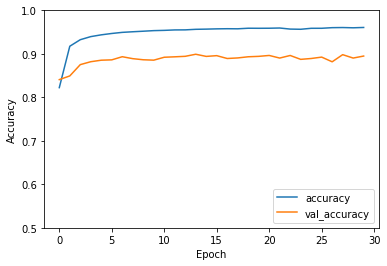

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

In [75]:
improved_model = models.Sequential()
improved_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
improved_model.add(layers.MaxPooling2D((2, 2)))
improved_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
improved_model.add(layers.LeakyReLU())
improved_model.add(layers.Dropout(0.3))
improved_model.add(layers.MaxPooling2D((2, 2)))
improved_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
improved_model.add(layers.LeakyReLU())
improved_model.add(layers.Dropout(0.3))
improved_model.add(layers.Flatten())
improved_model.add(layers.Dense(64, activation='relu'))
improved_model.add(layers.Dense(49))

improved_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 11, 11, 128)       0         
                                                                 
 dropout_13 (Dropout)        (None, 11, 11, 128)       0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                

In [76]:
improved_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = improved_model.fit(x_train, y_train, epochs=30, 
                    validation_data=(x_test, y_test))

Epoch 1/30
7262/7262 [==============================] - 33s 4ms/step - loss: 0.8029 - accuracy: 0.7906 - val_loss: 0.5646 - val_accuracy: 0.8503
Epoch 2/30
7262/7262 [==============================] - 34s 5ms/step - loss: 0.3637 - accuracy: 0.8987 - val_loss: 0.4418 - val_accuracy: 0.8828
Epoch 3/30
7262/7262 [==============================] - 32s 4ms/step - loss: 0.3110 - accuracy: 0.9136 - val_loss: 0.4307 - val_accuracy: 0.8852
Epoch 4/30
7262/7262 [==============================] - 32s 4ms/step - loss: 0.2853 - accuracy: 0.9205 - val_loss: 0.3730 - val_accuracy: 0.9029
Epoch 5/30
7262/7262 [==============================] - 32s 4ms/step - loss: 0.2704 - accuracy: 0.9250 - val_loss: 0.3767 - val_accuracy: 0.9011
Epoch 6/30
7262/7262 [==============================] - 36s 5ms/step - loss: 0.2601 - accuracy: 0.9274 - val_loss: 0.3671 - val_accuracy: 0.9039
Epoch 7/30
7262/7262 [==============================] - 32s 4ms/step - loss: 0.2540 - accuracy: 0.9297 - val_loss: 0.3781 - val_ac

1205/1205 - 3s - loss: 0.3504 - accuracy: 0.9160 - 3s/epoch - 2ms/step
0.9159727096557617


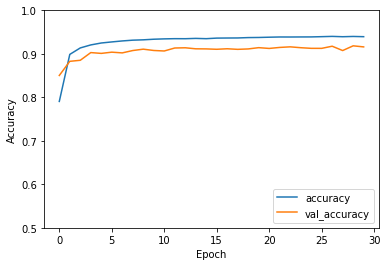

In [77]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = improved_model.evaluate(x_test, y_test, verbose=2)
print(test_acc)